<a href="https://www.kaggle.com/code/busetmkaya/spotify-top-10000-streamed-songs?scriptVersionId=226681334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spotify Top 10,000 Songs Analysis

## Objective
This notebook explores Spotify's top 10,000 streamed songs dataset to find out:

- Who are the top artists by number of songs in the top 10,000 list?
- What insights can we uncover about popular artists based on our data?

## Data Loading and Preview

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & preview the dataset
songs_df = pd.read_csv("/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv")

songs_df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


### Total Streams of Top 10 Artists

In [2]:
# Data preparation & aggregation
songs_df['Artist Name'] = songs_df['Artist Name'].str.strip()

top_artists_streams = (
    songs_df
    .groupby('Artist Name')['Total Streams']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

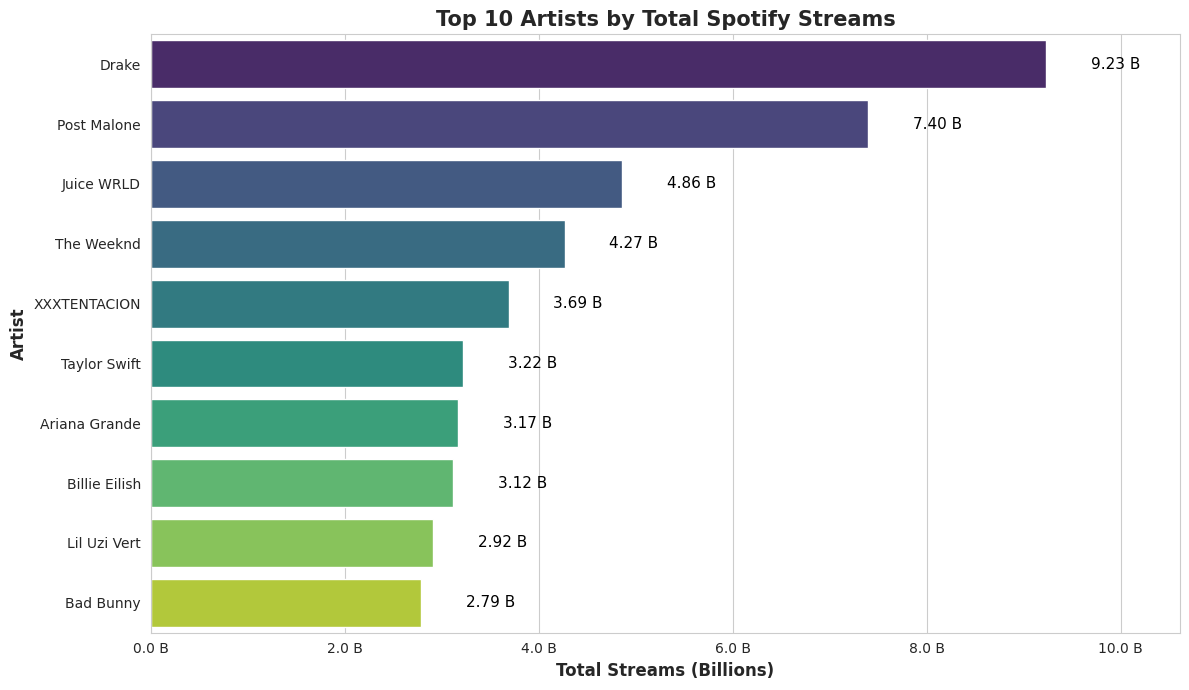

In [3]:
# Visualization

plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')

# Barplot
ax = sns.barplot(x=top_artists_streams.values, 
                 y=top_artists_streams.index, 
                 palette='viridis')

# Set labels and title
plt.xlabel("Total Streams (Billions)", fontsize=12, weight='bold')
plt.ylabel("Artist", fontsize=12, weight='bold')
plt.title("Top 10 Artists by Total Spotify Streams", fontsize=15, weight='bold')

# Annotate bars inside plot
for i, streams in enumerate(top_artists_streams.values):
    ax.text(streams + 0.05 * max(top_artists_streams.values),  # move slightly inside plot
            i, 
            f'{streams/1e9:.2f} B', 
            va='center', fontsize=11, color='black')

# Ensure all text is inside frame
plt.xlim(0, max(top_artists_streams.values) * 1.15)

# Custom ticks for readability
ticks = np.arange(0, max(top_artists_streams.values)*1.15, 2e9)
plt.xticks(ticks, [f'{tick/1e9:.1f} B' for tick in ticks])

plt.tight_layout()
plt.show()


## Conclusion

The analysis of Spotify's top 10,000 streamed songs dataset highlights distinct patterns regarding artist popularity:

- **Clear Market Leaders:**  
  Drake dominates Spotify streaming with over 9.2 billion streams indicating significant global reach and audience retention.

- **Stream Distribution:**  
  Artists like Post Malone, Juice WRLD, and The Weeknd also showcase considerable popularity, their lower total streams are notable lower compared to Drake.

- **Insight into Streaming Behavior:**  
  A few artists consistently produce multiple hits that achieve high streams, suggesting a loyal listener base. Conversely, artists with fewer songs but high streaming numbers indicate occasional, massive hits that gain global popularity.

Further analysis might explore **genre-based differences**, **regional streaming habits**, or examine **the longevity of song popularity**.

Thanks for reading!